## ECE 657A: Data and Knowledge Modelling and Analysis
### Assignment 1: Data Cleaning and Classification

#### Group 27 Submission
Ishpinder Kaur i7kaur@uwaterloo.ca\
Yuan Sun y228sun@uwaterloo.ca

In [1]:
# NumPy v1.20.3 https://numpy.org/
import numpy as np
# Pandas v1.2.4 https://pandas.pydata.org/
import pandas as pd
# Matplotlib v3.4.2 https://matplotlib.org/
import matplotlib.pyplot as plt
%matplotlib inline
# seaborn v0.11.1 https://seaborn.pydata.org/
import seaborn as sns
# scikit-learn v0.24.2 https://scikit-learn.org/
from sklearn.impute import KNNImputer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import roc_auc_score, roc_curve, classification_report
# SciPy v1.6.3 https://www.scipy.org/
from scipy.stats import zscore
from scipy.stats import kurtosis,skew
# Suppress warning messages for better readability
import warnings
warnings.filterwarnings('ignore')

#### Heart Disease Dataset:
It is a sample dataset representing various features that will help in predicting the presence of heart disiase in a patient. Its aim is to find target.

* Features:
     1. age : represents age in numbers.
     2. sex : represents the gender, with 0 as female and 1 as male.
     3. cp : Chest pain type with values( 0 = Asymptomatic angina, 1 = Atypical angina, 2 = Non-angina, 3 = Typical angina)
     4. trestbps : resting blood pressure(mm hg)
     5. chol : serum cholestrol (mg/dl)
     6. fbs : Fasting blood sugar > 120 mg/dl with values( 0 = False, 1= True)
     7. restecg : Resting electrocardiographic results with values( 0 = Left ventricular hypertrophy, 1 = Normal, 2 = ST-T wave abnormality)
     8. thalach : Maximum heart rate achieved, during thalium stress test
     9. exang : represents exercise induced angina with values( 0 = No, 1 =  Yes)
     10. oldpeak : represents ST depression induced by exercise, relative to rest
     11. slope : represents slope of peak exercise ST segment with values( 0 = Downsloping, 1 = Upsloping, 2 = Flat)
     12. ca : represents number of major vessels in range(0,3)
     13. thal : represents thalium stress test results with values(0 = NA, 1 = Fixed defect, 2 = Normal, 3 = Reversible defect)
     14. target : represents the presence of heart disease with values( 0 = No, 1 = Yes)
* Binary features:
    * sex
    * fbsand
    * exang
* Nominal features:
    * cp
    * restecg
    * slope
    * thal
* Ordinal features:
    * ca
* Numerical features:
    * age
    * restbps
    * chol
    * thalach
    * oldpeak

#### Data Retrieval and Exploration:

In [2]:
df_heart_disease= pd.read_csv('heart_disease_missing.csv')
df=df_heart_disease.copy()
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,212.000000,212.000000,212.000000,205.000000,202.000000,212.000000,207.000000,208.000000,212.000000,200.000000,210.000000,212.000000,211.000000,212.000000
mean,54.311321,0.688679,0.957547,131.784610,244.133256,0.132075,0.560386,149.647978,0.344340,1.113106,1.423810,0.731132,2.349112,0.542453
std,9.145339,0.464130,1.022537,18.057222,46.444257,0.339374,0.535149,22.076206,0.476277,1.255908,0.623622,1.038762,0.602117,0.499374
min,29.000000,0.000000,0.000000,93.944184,126.085811,0.000000,0.000000,88.032613,0.000000,-0.185668,0.000000,0.000000,0.858554,0.000000
25%,47.000000,0.000000,0.000000,119.968114,211.969594,0.000000,0.000000,135.946808,0.000000,0.050778,1.000000,0.000000,1.949795,0.000000
50%,55.000000,1.000000,1.000000,130.010256,241.467023,0.000000,1.000000,151.939216,0.000000,0.726060,1.000000,0.000000,2.078759,1.000000
75%,61.000000,1.000000,2.000000,139.965470,272.484222,0.000000,1.000000,165.260092,1.000000,1.816733,2.000000,1.000000,2.970842,1.000000
max,77.000000,1.000000,3.000000,192.020200,406.932689,1.000000,2.000000,202.138041,1.000000,6.157114,2.000000,4.000000,3.277466,1.000000


In [3]:
df.nunique()

age          41
sex           2
cp            4
trestbps    205
chol        202
fbs           2
restecg       3
thalach     208
exang         2
oldpeak     200
slope         3
ca            5
thal        211
target        2
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212 entries, 0 to 211
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       212 non-null    int64  
 1   sex       212 non-null    int64  
 2   cp        212 non-null    int64  
 3   trestbps  205 non-null    float64
 4   chol      202 non-null    float64
 5   fbs       212 non-null    int64  
 6   restecg   207 non-null    float64
 7   thalach   208 non-null    float64
 8   exang     212 non-null    int64  
 9   oldpeak   200 non-null    float64
 10  slope     210 non-null    float64
 11  ca        212 non-null    int64  
 12  thal      211 non-null    float64
 13  target    212 non-null    int64  
dtypes: float64(7), int64(7)
memory usage: 23.2 KB


## Question 1: Data Exploration
### 1.1 [CM1] Data Cleaning
It shows that there are missing values and negative values in dataset, which needs to be handled. Data Cleaning is a process of detection and correction of inaccurate data values, such as, missing values, invalid values, outliers and noise. So, in our dataset, there are 7, 10, 5, 4, 12, 2 and 1 missing values in trestbps, chol, restecg, thalach, oldpeak, slope and thal columns, respectively. Also, there is a presence of negative values in oldpeak column and out of range value in ca column. Therefore, replaced these values with unknown ones and later performed imputation.

In [5]:
# Count all the rows having NaN values:
print(f'\033[1mCount for Rows with NaN Values:\033[0m\n{df[df.isnull().any(axis=1)].count()}\n')
# Count all the rows with negative values:
print(f'\033[1mCount for Rows with Negative Values:\033[0m\n{df[df.values[:,:14]<0].count()}')

Count for Rows with NaN Values:
age         38
sex         38
cp          38
trestbps    31
chol        28
fbs         38
restecg     33
thalach     34
exang       38
oldpeak     26
slope       36
ca          38
thal        37
target      38
dtype: int64

Count for Rows with Negative Values:
age         38
sex         38
cp          38
trestbps    38
chol        37
fbs         38
restecg     36
thalach     37
exang       38
oldpeak     38
slope       38
ca          38
thal        37
target      38
dtype: int64


<AxesSubplot:>

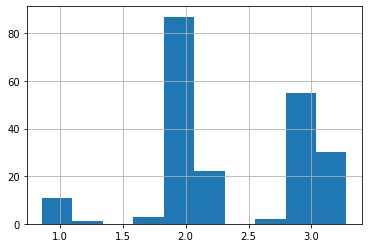

In [6]:
# Replacing negative values with np.nan:
df.oldpeak = np.where(df.oldpeak<0, np.nan, df.oldpeak)
# Replacing data in 'ca' where it's greater than 3 (0,3)
df.ca = np.where(df.ca>3,np.nan,df.ca)

# Dividing the features into Binary, Nominal, Ordinal and Numeric data:
binary_features = ['sex','fbs','exang']
nominal_features= ['cp','restecg','slope','thal']
ordinal_features= ['ca']
categorical_features = ['sex','fbs','exang','cp','restecg','slope','ca','thal']
numeric_features=['age','trestbps','chol','thalach','oldpeak']
cat_ord= ['cp','restecg','slope','ca','thal']

# Feature 'thal' is categorical, but provided data represents it as continuous, so, it will be converted into categorical form to perform further process.
df['thal'].hist()

Here, features have been divided depending upon their behaviors, such as:
- binary features are sex, fbs, exang
- nominal features are ap, restecg, slope, thal
- ordinal feature includes ca
- numerical feature has all the continuous variables

Furthermore, looking deep into dataset, it is visible (figure above) that ‘thal’ column of dataset is having continuous numerical values, but, in reality, it has categorical behavior. Hence, converted it from float column to category column.

In [7]:
df['thal']= pd.cut(df['thal'],3,labels= [1,2,3])
df['thal'].astype('Int64')

0      2
1      3
2      2
3      2
4      3
      ..
207    1
208    2
209    3
210    2
211    2
Name: thal, Length: 212, dtype: Int64

There are many ways to handle missing values such as, interpolation, extrapolation or imputation, but, it varies from dataset to dataset. In heart disease dataset, the missing values are handled by three methods, in which two methods are combination of another two methods:
- First method used is simple imputation by median
- Second method is a combination of interpolation for numeric values and median for categorical data
- Third method is also combination of knn imputation for numeric values and median for categories


In [8]:
# Handling missing data by median
df_median= df.copy()
df_median=df_median.fillna(df_median.median())
cat_median=df[categorical_features].copy()
cat_median=cat_median.fillna(cat_median.median())
# df_median

# Handling missing data by interpolation(numeric) and median(categorical):
df_interpolate= df[numeric_features].copy()
df_interpolate=df_interpolate.fillna(df_interpolate.interpolate())
df_interpolation= pd.concat([df_interpolate,cat_median,df.target],axis=1)
# df_interpolation

# Handling missing data by KNN Imputation(numeric) and median(categorical):
knn_imputed= df[numeric_features].copy()
kimputed= KNNImputer(n_neighbors=5)
knn_imputed= kimputed.fit_transform(knn_imputed)
knn_imputed= pd.DataFrame(knn_imputed,columns=df[numeric_features].columns)
knn_imputation=pd.concat([knn_imputed,cat_median,df.target],axis=1)
# knn_imputation

# Comparision of Missing Values handled by Median, Interpolation and KNN Imputation:
compare = pd.concat([df.corr(),df_median.corr(),df_interpolation.corr(),knn_imputation.corr()],keys=[
    'Original Dataset correlation','Median correlation','Interpolation correlation','KNN Imputation correlation'])
compare

age       sex        cp  trestbps  \
Original Dataset correlation age       1.000000 -0.140074 -0.084230  0.335944   
                             sex      -0.140074  1.000000 -0.057939 -0.049906   
                             cp       -0.084230 -0.057939  1.000000 -0.007449   
                             trestbps  0.335944 -0.049906 -0.007449  1.000000   
                             chol      0.185861 -0.195213 -0.061591  0.162162   
                             fbs       0.050823  0.081750  0.057205  0.138907   
                             restecg  -0.124819 -0.050203  0.035935 -0.106940   
                             thalach  -0.382280  0.017446  0.246019 -0.100284   
                             exang     0.114545  0.122773 -0.349369  0.088717   
                             oldpeak   0.080801  0.115038 -0.175151  0.146234   
                             slope    -0.117989 -0.057160  0.156145 -0.134180   
                             ca        0.389111  0.088996 -0.238708  0.071915   
                             target   -0.196967 -0.249428  0.490819 -0.118476   
Median correlation           age       1.000000 -0.140074 -0.084230  0.331159   
                             sex      -0.140074  1.000000 -0.057939 -0.049287   
                             cp       -0.084230 -0.057939  1.000000 -0.006081   
                             trestbps  0.331159 -0.049287 -0.006081  1.000000   
                             chol      0.182275 -0.190700 -0.059884  0.158675   
                             fbs       0.050823  0.081750  0.057205  0.132736   
                             restecg  -0.126079 -0.044643  0.035974 -0.110995   
                             thalach  -0.379480  0.017559  0.243831 -0.097124   
                             exang     0.114545  0.122773 -0.349369  0.086465   
                             oldpeak   0.085931  0.103196 -0.162622  0.136891   
                             slope    -0.123061 -0.054050  0.154827 -0.132938   
                             ca        0.396850  0.079135 -0.242469  0.066227   
                             target   -0.196967 -0.249428  0.490819 -0.114587   
Interpolation correlation    age       1.000000 -0.140074 -0.084230  0.318457   
                             trestbps  0.318457 -0.049125 -0.008003  1.000000   
                             chol      0.163386 -0.185987 -0.046192  0.130216   
                             thalach  -0.383527  0.014529  0.247382 -0.104446   
                             oldpeak   0.076005  0.099281 -0.155386  0.087869   
                             sex      -0.140074  1.000000 -0.057939 -0.049125   
                             fbs       0.050823  0.081750  0.057205  0.154423   
                             exang     0.114545  0.122773 -0.349369  0.103134   
                             cp       -0.084230 -0.057939  1.000000 -0.008003   
                             restecg  -0.126079 -0.044643  0.035974 -0.095158   
                             slope    -0.123061 -0.054050  0.154827 -0.130164   
                             ca        0.396850  0.079135 -0.242469  0.056168   
                             target   -0.196967 -0.249428  0.490819 -0.107400   
KNN Imputation correlation   age       1.000000 -0.140074 -0.084230  0.330554   
                             trestbps  0.330554 -0.046642 -0.002554  1.000000   
                             chol      0.189925 -0.200029 -0.065967  0.158039   
                             thalach  -0.381539  0.020173  0.242331 -0.092370   
                             oldpeak   0.103487  0.074398 -0.160099  0.153209   
                             sex      -0.140074  1.000000 -0.057939 -0.046642   
                             fbs       0.050823  0.081750  0.057205  0.122958   
                             exang     0.114545  0.122773 -0.349369  0.079069   
                             cp       -0.084230 -0.057939  1.000000 -0.002554   
                             restecg  -0.126079 -0.044643  0.035974 -0.1025

By using interpolation and knn imputation correlation is affected, but also, it gives 0.5 or 0.8 values for some categorical features which is invalid. So, we combined both interpolation and knn imputation for numeric data and median for categorical data. Also, knn_imputation provides better accuracy than others (provided the maximum accuracy of data, i.e., 100%, whereas other methods, gave 88.37 or 90.0697% accuracy).

Therefore, __KNN Imputation__ will be used for handling missing values.

In [9]:
df= knn_imputation.copy()

#### Effect of Smoothing by Moving Average:

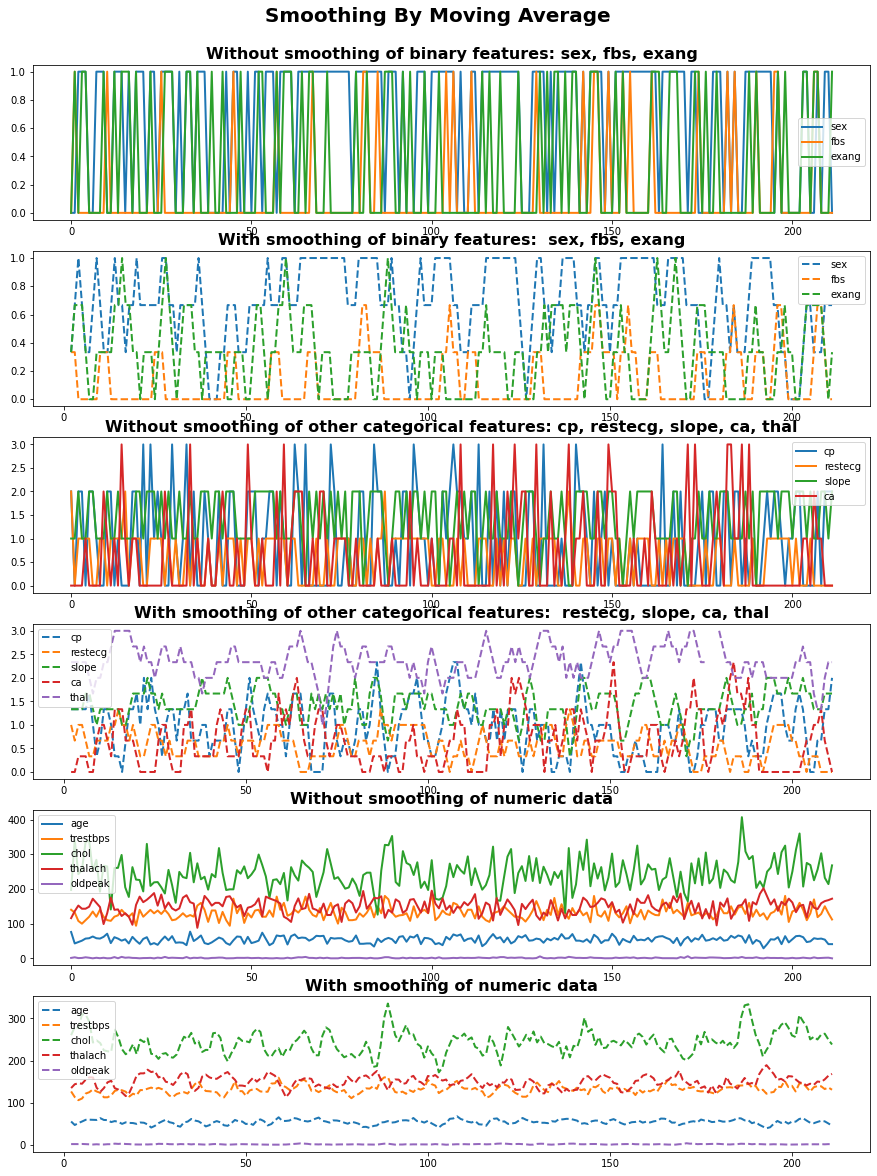

In [10]:
roll1=df[categorical_features].rolling(window=3)
smooth_heart_cat=roll1.mean()
roll2=df[numeric_features].rolling(window=3)
smooth_heart_num=roll2.mean()

fig, axes= plt.subplots(6,1,figsize=(15,20))
df[categorical_features].iloc[:,:3].plot(linewidth=2,ax=axes[0])
smooth_heart_cat.iloc[:,:3].plot(linestyle='dashed',linewidth=2,ax=axes[1])
df[categorical_features].iloc[:,3:8].plot(linewidth=2,ax=axes[2])
smooth_heart_cat.iloc[:,3:8].plot(linestyle='dashed',linewidth=2,ax=axes[3])
df[numeric_features].plot(linewidth=2,ax=axes[4])
smooth_heart_num.plot(linestyle='dashed',linewidth=2,ax=axes[5])
axes[0].set_title('Without smoothing of binary features: sex, fbs, exang',
                  fontsize=16,fontweight='bold')
axes[1].set_title('With smoothing of binary features:  sex, fbs, exang',
                  fontsize=16,fontweight='bold')
axes[2].set_title('Without smoothing of other categorical features: cp, restecg, slope, ca, thal',
                  fontsize=16,fontweight='bold')
axes[3].set_title('With smoothing of other categorical features:  restecg, slope, ca, thal',
                  fontsize=16,fontweight='bold')
axes[4].set_title('Without smoothing of numeric data',fontsize=16,fontweight='bold')
axes[5].set_title('With smoothing of numeric data',fontsize=16,fontweight='bold')
plt.suptitle('Smoothing By Moving Average',fontsize=20,fontweight='bold',y=0.92)
plt.show()

In case of smoothing, smoothing by moving average has been applied on data, which results into rows with NaN values. As, it leads to data loss, so smoothing __will not be applied__ for the dataset. Also, it provides invalid values for categorical data.
The first two figures show the impact of smoothing on binary and nominal data. The figure provides a clear picture of why smoothing should be avoided in categorical cases, as it provides float data entries for categorical data. 
Compared to the third figure, in terms of effect of smoothing on numeric data, it resulted in number of windows minus one rows of NaN values. So, it is cut out from  the application.

### Normalization

In [11]:
# OneHotEncoding on nominal and ordinal features:
onehot= OneHotEncoder(handle_unknown='ignore',sparse=False)
cat_encoded=onehot.fit_transform(df[cat_ord])
cat_encoded= pd.DataFrame(cat_encoded,columns=['cp=0','cp=1','cp=2','cp=3','restecg=0','restecg=1','restecg=2','slope=0','slope=1','slope=2','ca=0','ca=1','ca=2','ca=3','thal=0','thal=1','thal=2','thal=3'])
cat_encoded

,cp=0,cp=1,cp=2,cp=3,restecg=0,restecg=1,restecg=2,slope=0,slope=1,slope=2,ca=0,ca=1,ca=2,ca=3,thal=0,thal=1,thal=2,thal=3
0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
208,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
209,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
210,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


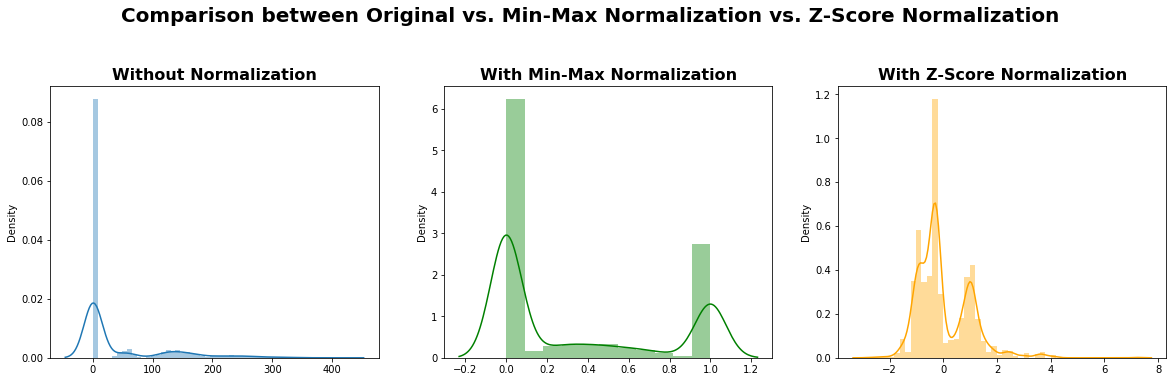

In [12]:
# Combining the data after OneHotEncoding
df_encoded= pd.concat([df[numeric_features],df[binary_features],cat_encoded],axis=1)

# Min-Max Normalization:
scaler=MinMaxScaler()
minmax_norm= scaler.fit_transform(df_encoded)
minmax_norm = pd.DataFrame(minmax_norm, columns= df_encoded.columns)

# Z-Score Normalization:
zscore_norm= zscore(df_encoded)
zscore_norm = pd.DataFrame(zscore_norm, columns= df_encoded.columns)

# Comparison between Original vs. Min-Max Normalization vs. Z-Score Normalization
fig, axes= plt.subplots(1,3,figsize=(20,5))
sns.distplot(df.values[:,:25],ax=axes[0])
sns.distplot(minmax_norm.values[:,:25],ax=axes[1], color='green')
sns.distplot(zscore_norm.values[:,:25],ax=axes[2], color='orange')
axes[0].set_title('Without Normalization',fontsize=16,fontweight='bold')
axes[1].set_title('With Min-Max Normalization',fontsize=16,fontweight='bold')
axes[2].set_title('With Z-Score Normalization',fontsize=16,fontweight='bold')
plt.suptitle('Comparison between Original vs. Min-Max Normalization vs. Z-Score Normalization',fontsize=20,fontweight='bold',y=1.1)
plt.show()

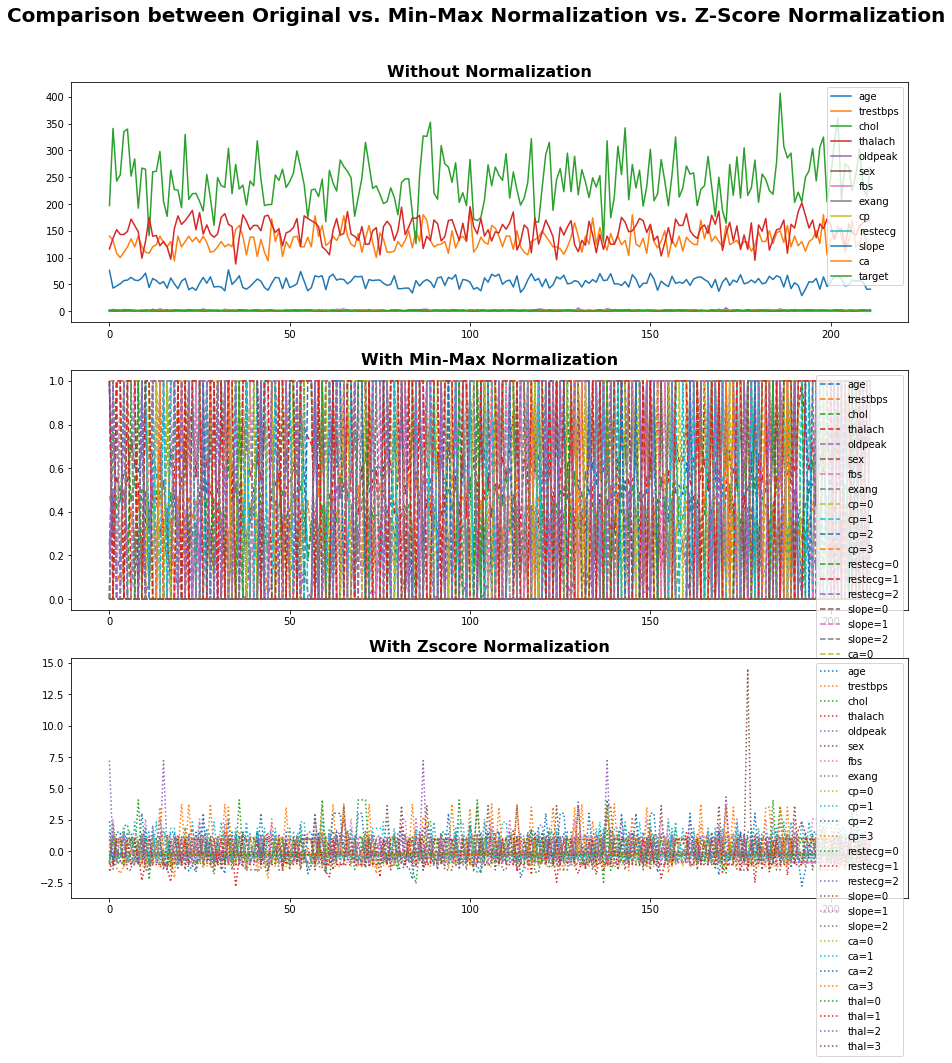

In [13]:
fig, axes= plt.subplots(3,1,figsize=(15,15))
df.plot(ax=axes[0])
minmax_norm.plot(linestyle='dashed',ax=axes[1])
zscore_norm.plot(linestyle='dotted',ax=axes[2])
axes[0].set_title('Without Normalization',fontsize=16,fontweight='bold')
axes[1].set_title('With Min-Max Normalization',fontsize=16,fontweight='bold')
axes[2].set_title('With Zscore Normalization',fontsize=16,fontweight='bold')
plt.suptitle('Comparison between Original vs. Min-Max Normalization vs. Z-Score Normalization',fontsize=20,fontweight='bold',y=0.95)
plt.show()

Two types of methods are performed, namely, min-max and z-score normalization. In which, min-max provided less accurate model than z-score. Also, z-score handles outliers. Thus, the best approach to normalize the data is z-score. Apart from it, it is quite visible from the graph that original data has skewness and many outliers, and, min-max normalization provides totally different distribution of data. However, z-score transformed the data really great and has less outliers. Lastly, min-max normalization tries to shrink the date into range (0, 1) whereas, z-score defines the range in which mean and standard deviation of variable is maintained and not disturbed.

As a result, __Z-Score__ will be used in model implementation.

In [14]:
norm_df=zscore_norm
norm_df['target']=df.target

### 1.2 [CM2] Data Visulalization

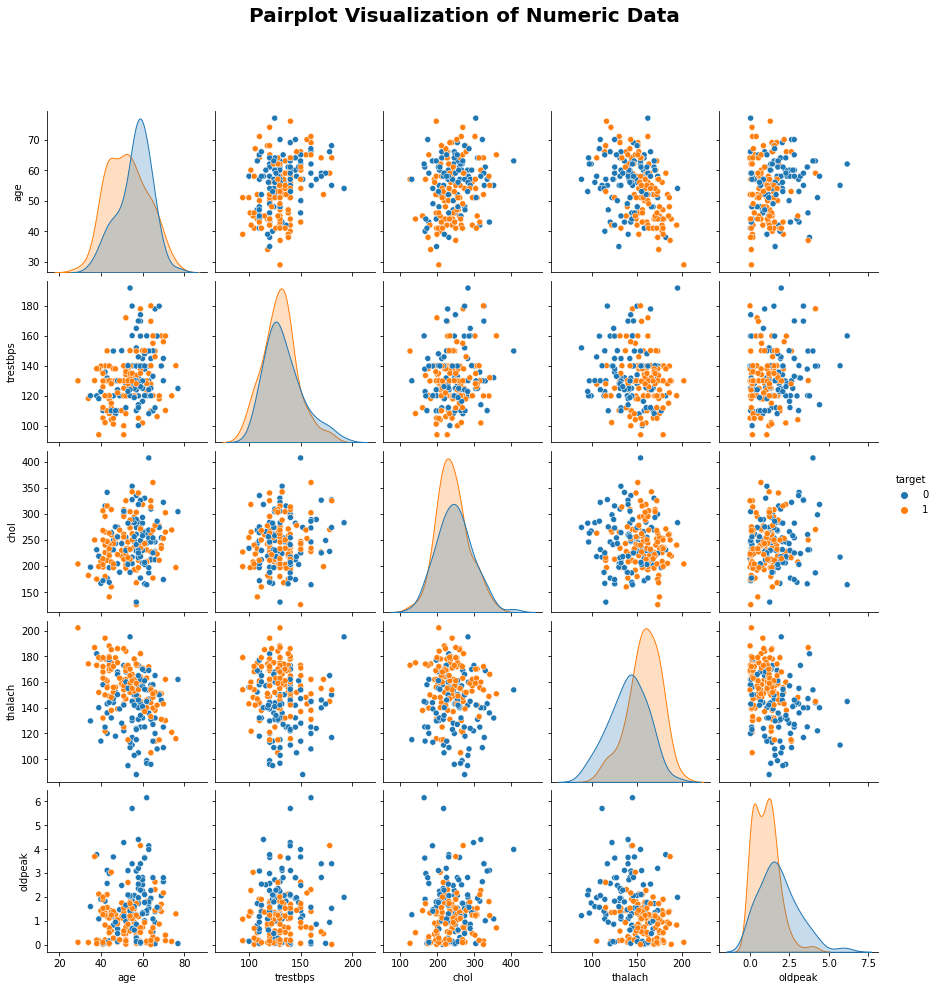

In [15]:
# Pairs Plot of Numeric Data
num=pd.concat([df[numeric_features],df.target],axis=1)
sns.pairplot(num,hue='target')
plt.suptitle('Pairplot Visualization of Numeric Data',fontsize=20,fontweight='bold',y=1.1)
plt.show()

It shows good correlation of __age__ with __heart rate (thalach)__ and __blood pressure(trestbps)__.

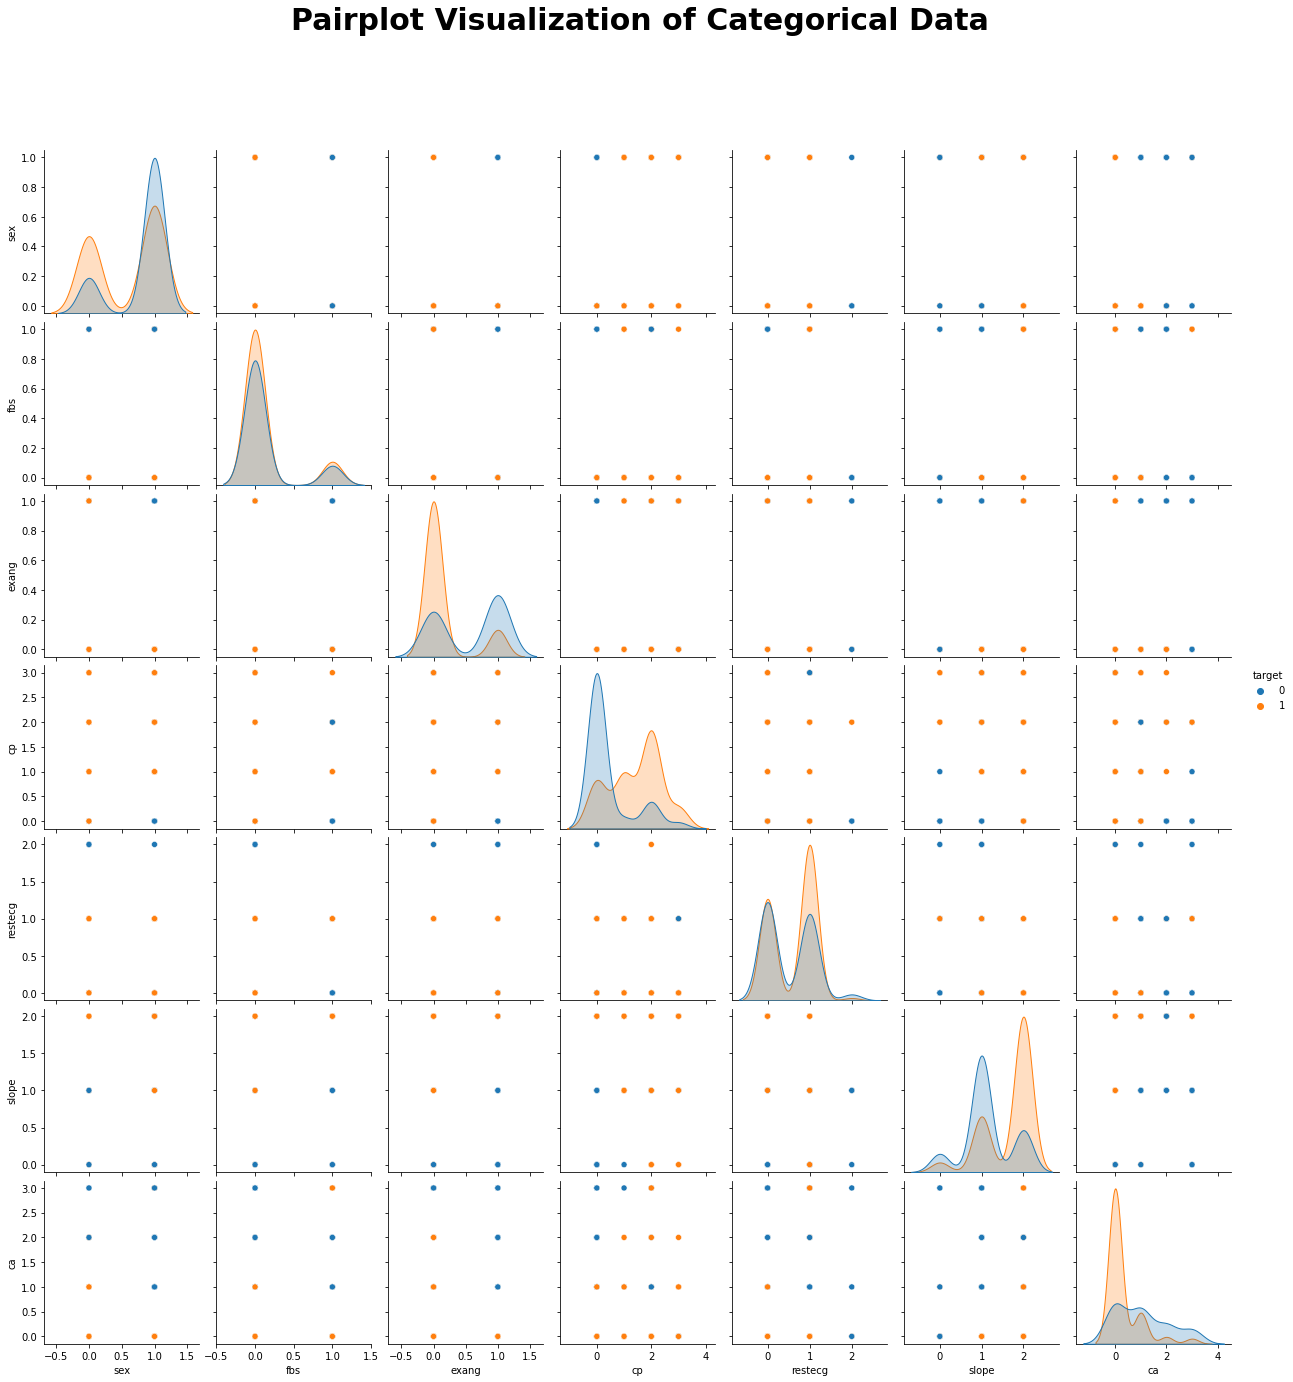

In [16]:
# Pairplot Visualization of Categorical Data:
cat=pd.concat([df[categorical_features],df.target],axis=1)
sns.pairplot(cat,hue='target')
plt.suptitle('Pairplot Visualization of Categorical Data',fontsize=30,fontweight='bold',y=1.1)
plt.show()

Pairs plot of numeric entities in dataset has been used to know the dependency of one numeric variable over another:
1. Age numeric factor shows a slight good correlation with trestbps (Blood Pressure), thalach (Heart Rate) and chol (Cholestrol) with correlation values as 0.33, -38 and 0.19, respectively. So, age has positive correlation with trestbps and chol, which means, as one variable increases, then the other too, depending upon their correlation. And, age has negative correlation with heart rate, thalach, which means as age increases heart rate decreases. Furthermore, in bivariate visualization, the effect of age is shown with respect to thalach, trestbps and chol features and also, it displays the chances of one, having heart disease, relative to about features. Hence, age is one of the important factor.
2. Other considerable factors are exang and cp, as their correlation with predicting the heart disease risk is better, compared to other features. The correlation of exang with target is negative (-0.45), meaning heart disease risk will be lower in the having exang induce angina. On the other hand, chest pain (cp) has positive correlation with target, defining that, with the increase in chest pain, the heart disease chance will also rise.
3. In case of categorical data, pairplot confirms that there is no strong correlation between any of these features. Therefore, __age__ and __sex__ will be considered two important features.

#### Univariate Visualization

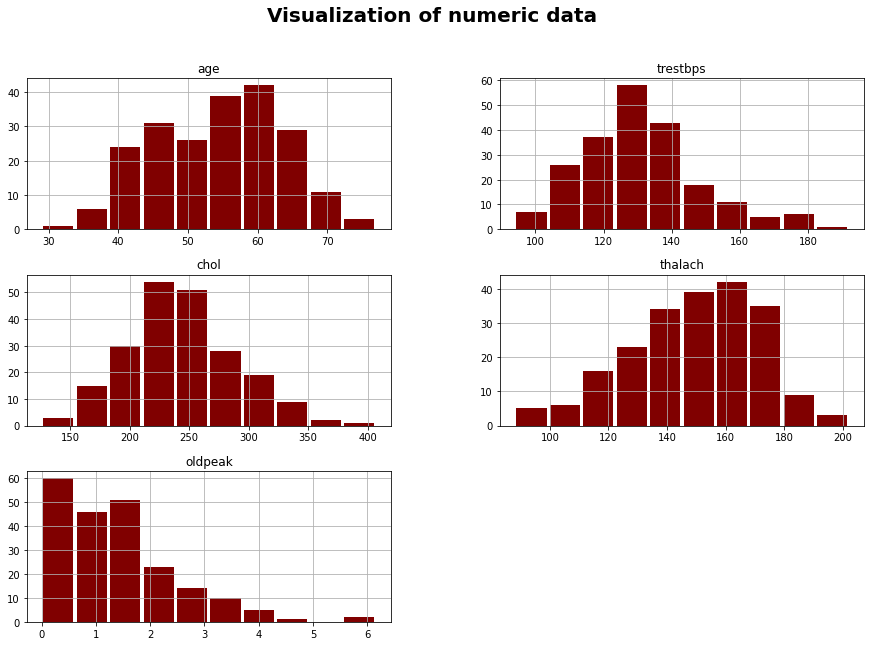

In [17]:
# Visualization of Numeric Data:
df[numeric_features].hist(figsize=(15,10),color=['maroon'],rwidth=0.9)
plt.suptitle('Visualization of numeric data',fontsize=20,fontweight='bold')
plt.show()

It represents the distribution of different numerical features of data, either normally or skewed.

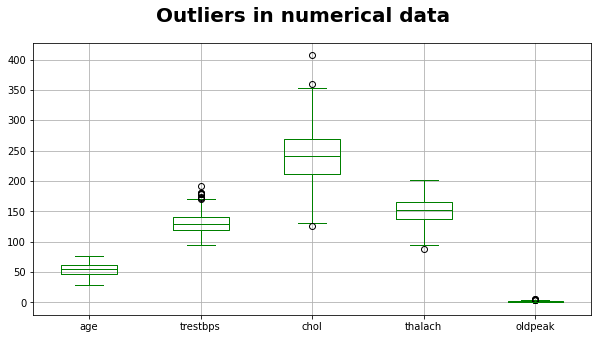

In [18]:
# Outliers in Numerical Data:
df[numeric_features].boxplot(figsize=(10,5),color='green')
plt.suptitle('Outliers in numerical data',fontsize=20,fontweight='bold')
plt.show()

Here, it depicts the presence of outliers in numeric data. Although, it should be removed, but removing it may not always lead to correct results. So, by using Z-Score normalization, this problem will be minimized. In numeric values, the figure represents their distribution and skewness, which also tells about presence of outliers in skewed data. Observation from univariate numeric plotting is as:
1. Age and chol has slightly normal distribution, with a few outliers.
2. Oldpeak is skewed and has many outliers.
3. Thalach and trestbps is not skewed but, it is also not exactly normally distributed, so it contains few outliers as well.
4. From the outliers diagram, it becomes crystal clear that oldpeak has maximum number of outliers, whereas , others have less number of outliers in data, which will definitely be handled further.

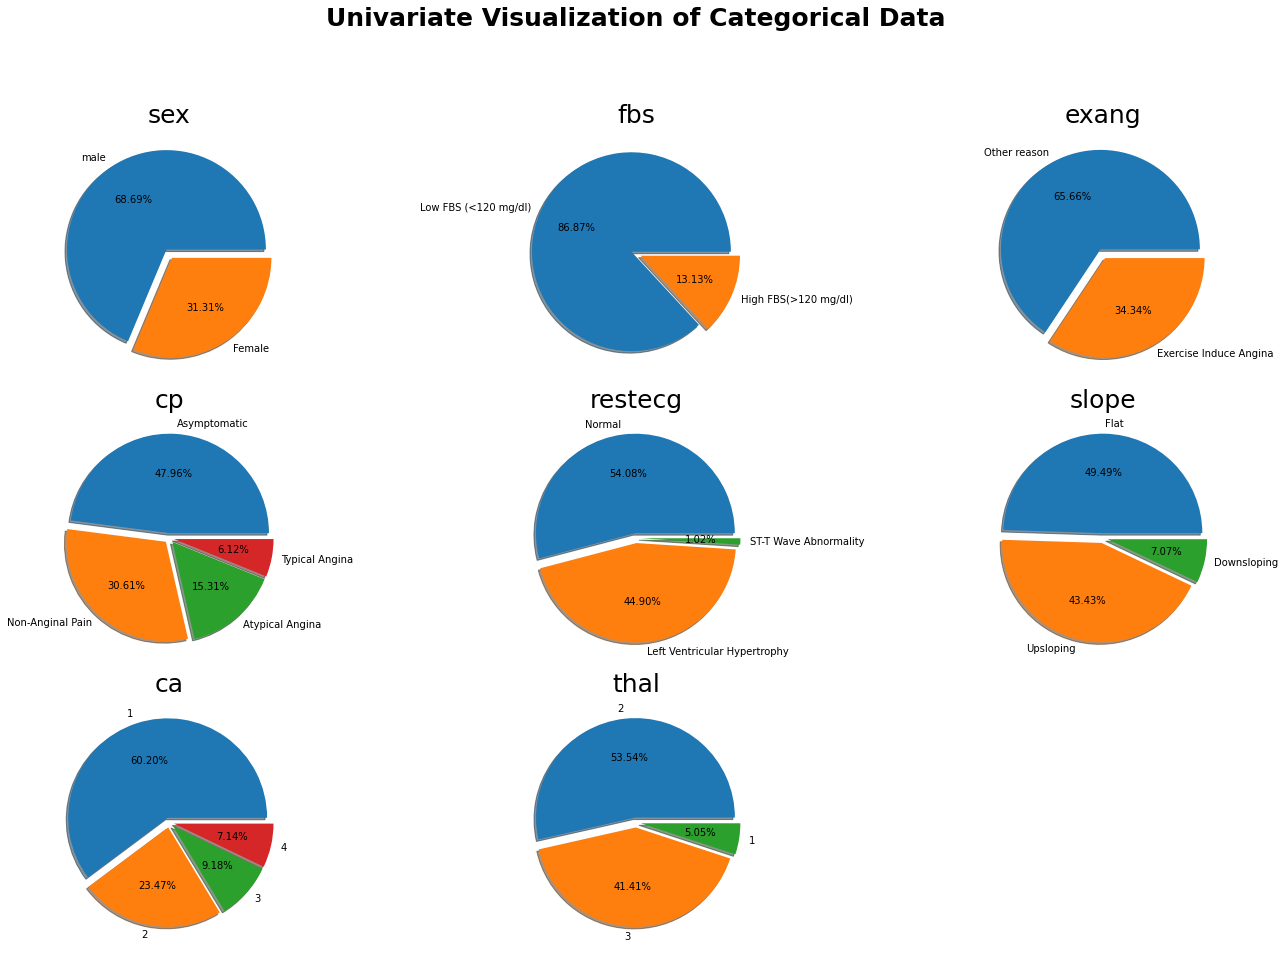

In [19]:
# Visualization of Categorical Data:
cat_val_names= {'sex':{0:'Female',1:'male'}, 
                'cp':{0:'Asymptomatic',1:'Atypical Angina',2:'Non-Anginal Pain',3:'Typical Angina'},
               'fbs':{0: 'Low FBS (<120 mg/dl)',1: 'High FBS(>120 mg/dl)'},
               'restecg':{0:'Left Ventricular Hypertrophy',1:'Normal',2:'ST-T Wave Abnormality'},
               'exang':{0:'Other reason',1:'Exercise Induce Angina'},
               'slope':{0:'Downsloping',1:'Upsloping',2:'Flat'},
               'ca':{0:1,1:2,2:3,3:4},
                'thal':{1:1,2:2,3:3}
               }
fig= plt.figure(figsize=(20,12))
for i in range(len(list(df[categorical_features].columns))):
    labels=list(df[categorical_features][categorical_features[i]].value_counts().reset_index()['index'])
    new_labels= [cat_val_names[categorical_features[i]][j] for j in labels]
    ex= tuple( 0.05 for m in range(len(labels)))
        
    ax= plt.subplot(3,3,i+1)
    size= [k for k in list(df[categorical_features][categorical_features[i]].
                           value_counts().reset_index()[categorical_features[i]])]
    percent = [int((l/sum(size))*100) for l in size]

    ax.pie(percent,labels=new_labels,explode=ex,shadow=True,autopct='%0.2f%%')
    plt.title(categorical_features[i], fontsize= 25)
plt.tight_layout()
plt.suptitle('Univariate Visualization of Categorical Data',fontsize=25,fontweight='bold',y=1.1)
plt.show()

All these columns represent the proportion of different categories of features, with respect to heart disease data. In categorical values, the percentage represents their proportion of their presence in particular data variable. Observations are as follows: 
1. 68.69% represents the male data in sex column and the rest 31.31% represents the female data in same.
2. There are 13.13% data entries having sugar level or high fbs >120 mg/dl.
3. 34.34% of sample data has exercise induce angina.
4. The most common type of pain found with maximum percentage is Asymptomatic chest pain with 47.96% and least found is Typical angina chest pain with 6.12% of the whole.
5. In restecg, maximum (54.08%) of the data have normal results and only 1. 02% suffers from ST-T wave abnormality.
6. Almost for half of the data, the slope is flat.
7. In ca, around 60.20% of data, has 1 major vessel and 7.14% has maximum (4) major vessels.
8. In thal, 53.54% (more than half of data variable) provides normal result and about only 5% shows fixed defects.

#### Bivariate  Visualization

The chosen features showing great impact are: __age__ (w.r.t. __thalach,trestbps,chol__), __cp, exang__, and __sex__.

Risk of Heart attack with increase Heart rate (thalach), cholestrol (chol) and Blood Pressure (trestbps), relative to Age.

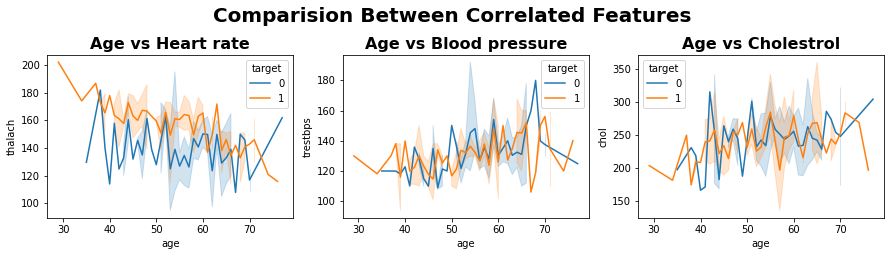

In [20]:
# Risk of heart attack with increase Heart rate (thalach), cholestrol (chol) and Blood Pressure (trestbps), relative to Age:
fig, axes= plt.subplots(1,3,figsize=(15,3))
sns.lineplot(df.age,df.thalach,hue= df.target,ax=axes[0])
sns.lineplot(df.age,df.trestbps,hue= df.target,ax=axes[1])
sns.lineplot(df.age,df.chol,hue= df.target,ax=axes[2])
axes[0].set_title('Age vs Heart rate',fontsize=16,fontweight='bold')
axes[1].set_title('Age vs Blood pressure',fontsize=16,fontweight='bold')
axes[2].set_title('Age vs Cholestrol',fontsize=16,fontweight='bold')
plt.suptitle('Comparision Between Correlated Features',fontsize=20,fontweight='bold',y=1.1)
plt.show()
plt.style.use('fivethirtyeight')

It shows that as cholestrol increases, risk of heart disease will increase as well. Also, as blood pressure and age increases, heart risk increases as well. However, as heart rate decreases, chances of heart disease increments.

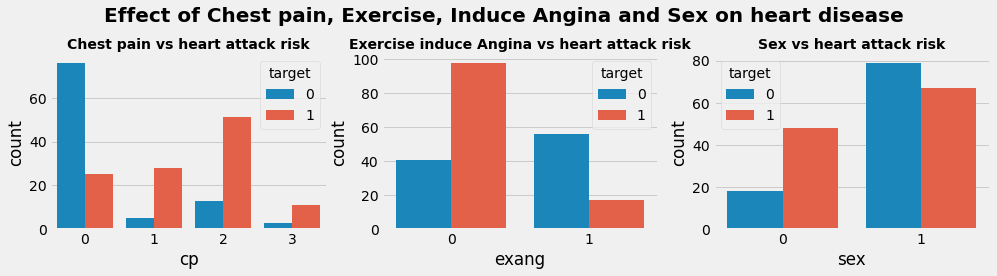

In [21]:
# Comparision of correlated features in heart_disease dataset:
corr_features=df.corr()

# Plot
fig, axes= plt.subplots(1,3,figsize=(15,3))
sns.countplot(data=df,x='cp',hue=df.target,ax=axes[0])
sns.countplot(data=df,x=df.exang,hue=df.target,ax=axes[1])
sns.countplot(data=df,x=df.sex,hue=df.target,ax=axes[2])
axes[0].set_title('Chest pain vs heart attack risk',fontsize=14,fontweight='bold')
axes[1].set_title('Exercise induce Angina vs heart attack risk',fontsize=14,fontweight='bold')
axes[2].set_title('Sex vs heart attack risk',fontsize=14,fontweight='bold')
plt.suptitle('Effect of Chest pain, Exercise, Induce Angina and Sex on heart disease',fontsize=20,fontweight='bold',y=1.1)
plt.show()

Few observations:
1. It shows with increase in age, blood pressure (trestbps) will increase as well as the risk of heart disease.
2. With increase in age, cholesterol (chol) will rise and so does the risk.
3. As age increments, the heart rate (thalach) decreases and risk increases.
4. In countplot, it is visible that, chest pain and other reasons than exercise indices angina will increase the chances of heart disease.
5. More male patients are found to have risk of heart disease, comparing to female.

### 1.3 [CM3]
#### Correlation Coefficients

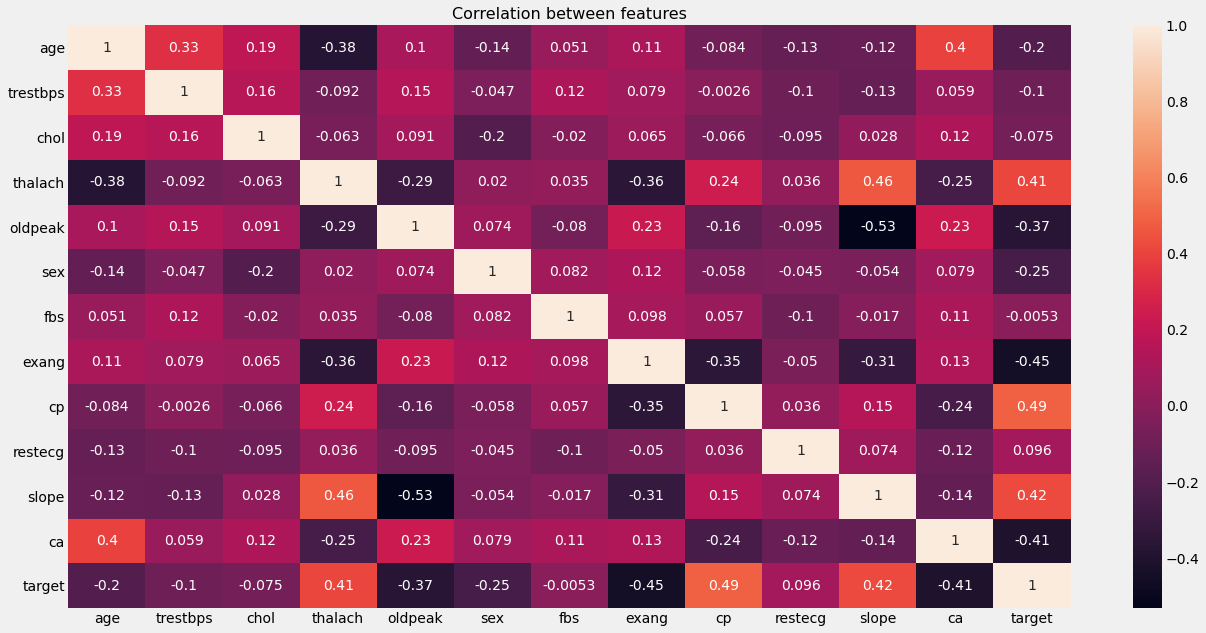

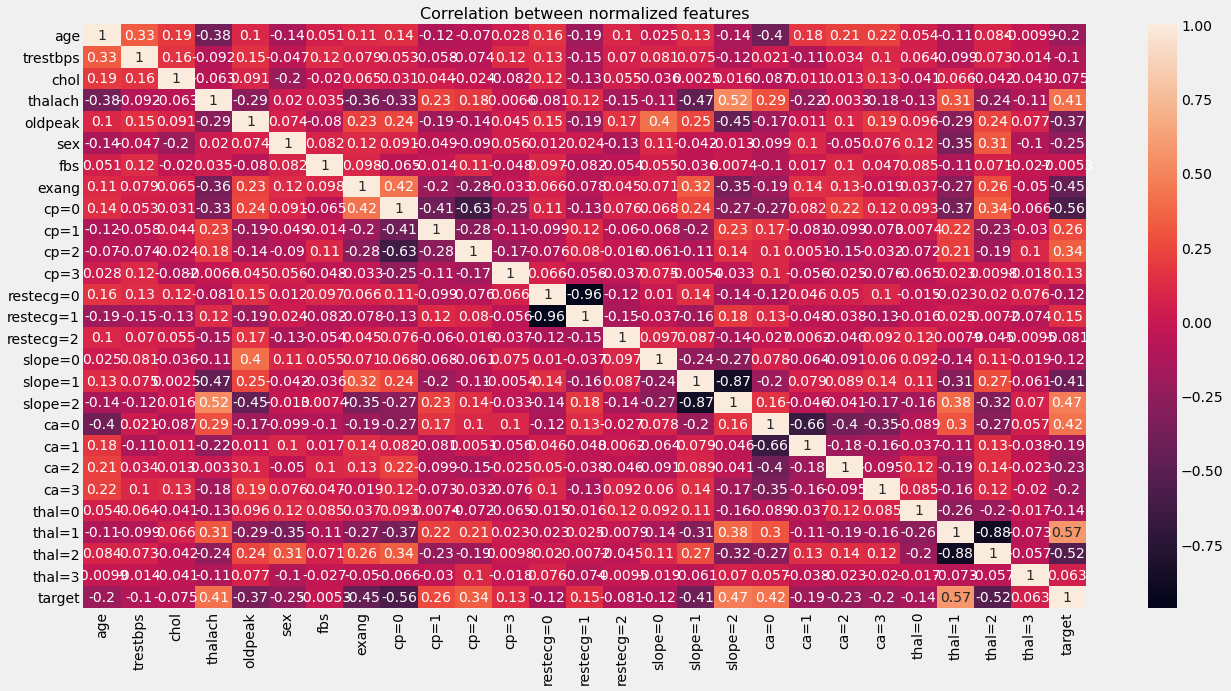

In [22]:
# Correlation between features
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True)
plt.title('Correlation between features',fontsize=16)
plt.show()

# Correlation between normalized features:
plt.figure(figsize=(20,10))
sns.heatmap(norm_df.corr(),annot=True)
plt.title('Correlation between normalized features',fontsize=16)
plt.show()

Correlation describes the dependency of variable on each other. There are few columns, namely, thalach, exang, cp, slope and ca, which are having better and strong correlation with target variable, having correlation values as 0.41, -0.45, 0.49, 0.42 and -0.41 respectively. Therefore, thalach, co and slope are positively correlated wherever as, exang and ca has negative coorelation.

#### Mean, Variance, Skew and Kurtosis of Heart Disease Dataset

Mean:
age          54.311321
trestbps    131.584079
chol        243.566875
thalach     149.728989
oldpeak       1.370551
sex           0.688679
fbs           0.132075
exang         0.344340
cp            0.957547
restecg       0.570755
slope         1.419811
ca            0.655660
target        0.542453
dtype: float64



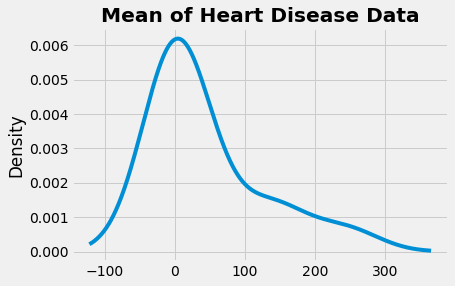

Normalized Mean:
age          4.608473e-17
trestbps    -9.803479e-16
chol        -5.362587e-16
thalach      1.298751e-16
oldpeak      7.541138e-17
sex          1.047380e-17
fbs          0.000000e+00
exang        3.770569e-17
cp=0         8.379042e-18
cp=1         2.513713e-17
cp=2         6.284281e-17
cp=3         1.256856e-16
restecg=0   -3.351617e-17
restecg=1    8.379042e-18
restecg=2   -6.703233e-17
slope=0      4.189521e-17
slope=1     -1.571070e-17
slope=2     -2.723189e-17
ca=0         5.027425e-17
ca=1        -2.304236e-17
ca=2         2.304236e-17
ca=3         5.027425e-17
thal=0       2.513713e-17
thal=1       4.608473e-17
thal=2      -1.791020e-16
thal=3       2.094760e-17
target       5.424528e-01
dtype: float64



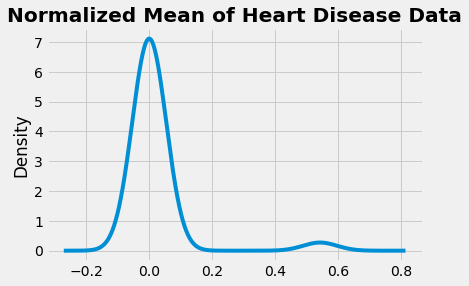

Variance:
age           83.637217
trestbps     317.750965
chol        2081.640550
thalach      478.645304
oldpeak        1.228762
sex            0.215416
fbs            0.115175
exang          0.226840
cp             1.045583
restecg        0.284070
slope          0.386904
ca             0.880868
target         0.249374
dtype: float64



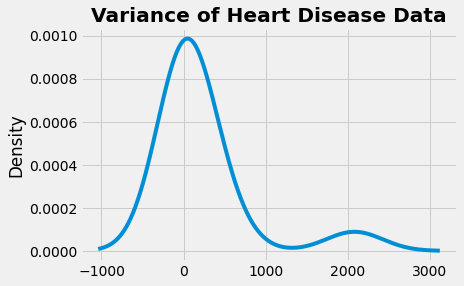

Normalized Variance:
age          1.004739
trestbps     1.004739
chol         1.004739
thalach      1.004739
oldpeak      1.004739
sex          1.004739
fbs          1.004739
exang        1.004739
cp=0         1.004739
cp=1         1.004739
cp=2         1.004739
cp=3         1.004739
restecg=0    1.004739
restecg=1    1.004739
restecg=2    1.004739
slope=0      1.004739
slope=1      1.004739
slope=2      1.004739
ca=0         1.004739
ca=1         1.004739
ca=2         1.004739
ca=3         1.004739
thal=0       1.004739
thal=1       1.004739
thal=2       1.004739
thal=3       1.004739
target       0.249374
dtype: float64



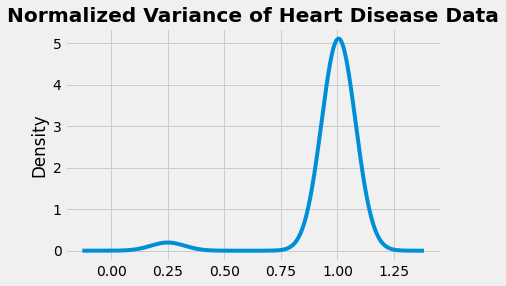

Skew:
age        -0.106027
trestbps    0.704102
chol        0.364810
thalach    -0.408051
oldpeak     1.213051
sex        -0.820789
fbs         2.188903
exang       0.659880
cp          0.461438
restecg     0.093288
slope      -0.586510
ca          1.294338
target     -0.171644
dtype: float64



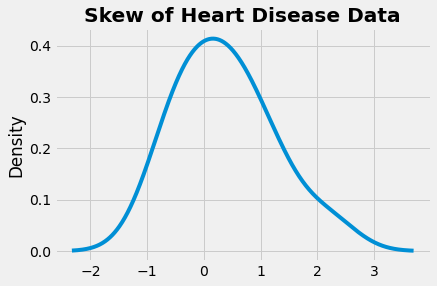

Normalized Skew:
age          -0.106027
trestbps      0.704102
chol          0.364810
thalach      -0.408051
oldpeak       1.213051
sex          -0.820789
fbs           2.188903
exang         0.659880
cp=0          0.095119
cp=1          1.913195
cp=2          0.869257
cp=3          3.519744
restecg=0     0.210164
restecg=1    -0.133309
restecg=2     7.122925
slope=0       3.371961
slope=1       0.248913
slope=2       0.038012
ca=0         -0.387004
ca=1          1.284703
ca=2          2.703413
ca=3          3.237236
thal=0        3.864934
thal=1       -0.114199
thal=2        0.366994
thal=3       14.560220
target       -0.171644
dtype: float64



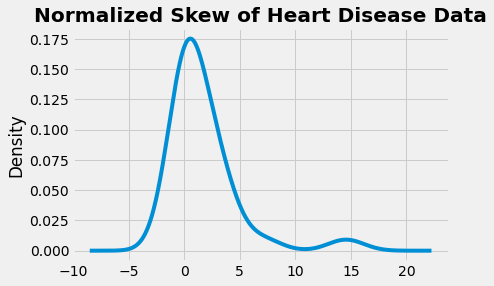

Kurtosis:
age        -0.561563
trestbps    0.703382
chol        0.351762
thalach    -0.160319
oldpeak     2.108134
sex        -1.339028
fbs         2.817791
exang      -1.579550
cp         -1.240674
restecg    -1.193589
slope      -0.579659
ca          0.575571
target     -1.989397
dtype: float64



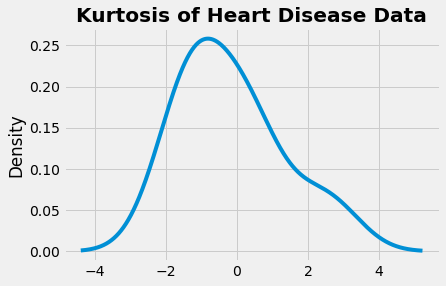

Normalized Kurtosis:
age           -0.561563
trestbps       0.703382
chol           0.351762
thalach       -0.160319
oldpeak        2.108134
sex           -1.339028
fbs            2.817791
exang         -1.579550
cp=0          -2.010005
cp=1           1.676038
cp=2          -1.256334
cp=3          10.487451
restecg=0     -1.974549
restecg=1     -2.001198
restecg=2     49.200143
slope=0        9.459272
slope=1       -1.956591
slope=2       -2.017680
ca=0          -1.867940
ca=1          -0.352957
ca=2           5.358912
ca=3           8.560368
thal=0        13.060847
thal=1        -2.005973
thal=2        -1.883171
thal=3       212.000000
target        -1.989397
dtype: float64



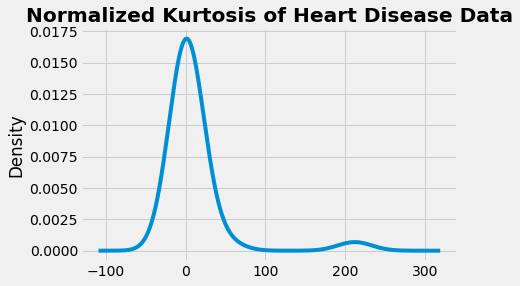


Summarized View on Mean, Variance, Skew and Kurtosis of Heart Disease Data:


,Mean,Variance,Skew,Kurtosis
age,54.311321,83.637217,-0.106027,-0.561563
trestbps,131.584079,317.750965,0.704102,0.703382
chol,243.566875,2081.640550,0.364810,0.351762
thalach,149.728989,478.645304,-0.408051,-0.160319
oldpeak,1.370551,1.228762,1.213051,2.108134
sex,0.688679,0.215416,-0.820789,-1.339028
fbs,0.132075,0.115175,2.188903,2.817791
exang,0.344340,0.226840,0.659880,-1.579550
cp,0.957547,1.045583,0.461438,-1.240674
restecg,0.570755,0.284070,0.093288,-1.193589


In [23]:
# Mean
mean=df.mean()
print(f'\033[1mMean:\033[0m\n{mean}\n')
mean.plot(kind='density')
plt.title("Mean of Heart Disease Data",fontweight='bold')
plt.show()
# Normalized Mean
norm_mean=norm_df.mean()
print(f'\033[1mNormalized Mean:\033[0m\n{norm_mean}\n')
norm_mean.plot(kind='density')
plt.title("Normalized Mean of Heart Disease Data",fontweight='bold')
plt.show()

# Variance
variance=df.var()
print(f'\033[1mVariance:\033[0m\n{variance}\n')
variance.plot(kind='density')
plt.title("Variance of Heart Disease Data",fontweight='bold')
plt.show()
# Normalized Variance
norm_variance=norm_df.var()
print(f'\033[1mNormalized Variance:\033[0m\n{norm_variance}\n')
norm_variance.plot(kind='density')
plt.title("Normalized Variance of Heart Disease Data",fontweight='bold')
plt.show()

# Skew
skew=df.skew()
print(f'\033[1mSkew:\033[0m\n{skew}\n')
skew.plot(kind='density')
plt.title("Skew of Heart Disease Data",fontweight='bold')
plt.show()
# Normalized Skew
norm_skew=norm_df.skew()
print(f'\033[1mNormalized Skew:\033[0m\n{norm_skew}\n')
norm_skew.plot(kind='density')
plt.title("Normalized Skew of Heart Disease Data",fontweight='bold')
plt.show()

# Kurtosis
kurtosis=df.kurtosis()
print(f'\033[1mKurtosis:\033[0m\n{kurtosis}\n')
kurtosis.plot(kind='density')
plt.title("Kurtosis of Heart Disease Data",fontweight='bold')
plt.show()
# Normalized Kurtosis
norm_kurtosis=norm_df.kurtosis()
print(f'\033[1mNormalized Kurtosis:\033[0m\n{norm_kurtosis}\n')
norm_kurtosis.plot(kind='density')
plt.title("Normalized Kurtosis of Heart Disease Data",fontweight='bold')
plt.show()

# Summary
summary= pd.concat([mean,variance,skew,kurtosis],axis=1,keys=['Mean','Variance','Skew','Kurtosis'])
print(f'\033[1m\nSummarized View on Mean, Variance, Skew and Kurtosis of Heart Disease Data:\033[0m')
summary

__Mean__ \
It represents the average of data and also defines the nature of data as symmetrical and assymetrical. If mean is close to medean, it represents less outliers. If mean and median difference is more, it represents the asymmetrical nature of data which could leads to more numbers of outliers.

__Variance__ \
It is a variability measure. It determines the degree of spread, the more spread the data is, the more is the variance.

__Skew__ \
Despite the skewness of data, positively skewed or negatively. In general it shows whether the data is symmetrical. Also, if it is asymmetrical, the position of outliers can be determined with skewness. Left/negative skewed means there is tail and presence of outliers on the left side of asymmetrical data, and right/positive skewed means there is tail and presence of outliers on the right side of asymmetrical data.

__Kurtosis__ \
It tells the tail heaviness of distribution, such as heavy tailed or lightly tailed.
High kurtosis means Heavy tailed that is more, outliers and low kutosis means less outliers.

## Question 2: KNN
### 2.1 Dividing Data
For Train_Test_Validate, 20% of data will be used for testing whereas, 80% for training purposes, in which 10% will be further used for validation.

In [24]:
# Define features and target for the training
features= zscore_norm
target= df.target

# Dividing data using train_test_split()
x_train, x_test, y_train, y_test = train_test_split(features,target,test_size=0.2,random_state=98)
x_train_new, x_val, y_train_new, y_val = train_test_split(x_train,y_train,test_size=0.1,random_state=98)

### 2.2 [CM4] Training and Testing

In [25]:
knn= KNeighborsClassifier()
knn.fit(x_train,y_train)
predictions=knn.predict(x_test)
original_acc=metrics.accuracy_score(y_test,predictions)
print(f"Accuracy of the model is {original_acc} using classifier's default parameters.")

Accuracy of the model is 0.9069767441860465 using classifier's default parameters.


### 2.3 Parameter Tuning
#### [CM5] Accuracy vs. k Plot

,Model(k),Validation set(k)
,accuracy rate,accuracy rate
k=1,0.883721,0.764706
k=5,0.906977,0.823529
k=10,0.906977,0.823529
k=15,0.906977,0.823529
k=20,0.883721,0.823529
k=25,0.883721,0.823529
k=30,0.906977,0.823529
k=35,0.906977,0.882353


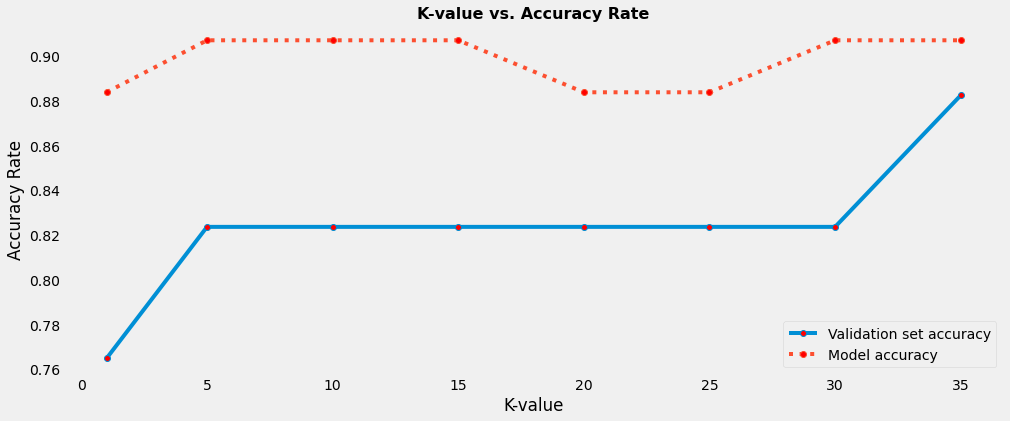

In [26]:
accuracy1=[]
r=[1,5,10,15,20,25,30,35]
for i in r:
    knn= KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train_new,y_train_new)
    accuracy1.append(metrics.accuracy_score(y_val,knn.predict(x_val)))
accuracy2=[]
for j in r:
    knn= KNeighborsClassifier(n_neighbors=j)
    knn.fit(x_train,y_train)
    accuracy2.append(metrics.accuracy_score(y_test,knn.predict(x_test)))

plt.figure(figsize=(15,6))
plt.plot(r,accuracy1,marker='o',markerfacecolor='r')
plt.plot(r,accuracy2,marker='o',markerfacecolor='r',linestyle='dotted')
plt.xlabel("K-value")
plt.ylabel("Accuracy Rate")
plt.title("K-value vs. Accuracy Rate", fontsize=16, fontweight='bold')
plt.legend(['Validation set accuracy','Model accuracy'])
plt.grid()
k_accurate_val=pd.DataFrame(accuracy1,index=["k=1","k=5","k=10","k=15","k=20","k=25","k=30","k=35"],columns=["accuracy rate"])
k_accurate_test=pd.DataFrame(accuracy2,index=["k=1","k=5","k=10","k=15","k=20","k=25","k=30","k=35"],columns=["accuracy rate"])

k_accurate=pd.concat([k_accurate_test,k_accurate_val],axis=1,keys=[' Model(k)','Validation set(k)'])
k_accurate

Above shows the different outputs and difference between validation and testing set as well as their performances. After parameter tuning, it turned out that n_neighbors or k = 5, provides the best accuracy. Also, the given plot describes about the nature of validation set and test set. Given validation set, the maximum accuracy achieved is 0.8824 at k = 35 and 0.8235 at k = 5, whereas the test set provides maximum accuracy of 0.9070 at k = 5. So, accuracy is effected depending upon the sample of data provided. Also, parameter tuning helps in determining the accuracy rate, with change in k value.

In addition, in k-fold cross validation, the training data is split into k splits and performing iterations on each split. Thus, it provides models with the ability to train on multiple train test split, rather than single train test split. So, __k-fold cross validation__ is better than simple train validate test split, it improves the performance of model better comparing to simple split methods.

#### [CM6] Evaluation of KNN model:
##### AUC and f-score:

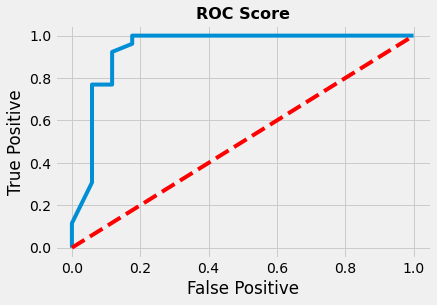

The AUC for the model is 0.9366515837104072, and f-score is 0.9027149321266968.



,0,1,accuracy,macro avg,weighted avg
precision,0.882353,0.923077,0.906977,0.902715,0.906977
recall,0.882353,0.923077,0.906977,0.902715,0.906977
f1-score,0.882353,0.923077,0.906977,0.902715,0.906977
support,17.000000,26.000000,0.906977,43.000000,43.000000


In [27]:
ra_score1=roc_auc_score(y_test,knn.predict(x_test))
fpr1, tpr1, thresholds1= roc_curve(y_test,knn.predict_proba(x_test)[:,1])
# ROC Plot
plt.figure()
plt.plot(fpr1, tpr1, label=" AUC : %0.2f"% ra_score1)
plt.plot((0,1),'r--')
plt.xlabel("False Positive")
plt.ylabel("True Positive")
plt.title('ROC Score',fontweight='bold',fontsize=16)
plt.show()
# AUC
auc= metrics.auc(fpr1,tpr1)
# f-score
f1score= metrics.f1_score(y_test,predictions,average='macro')
# Output
print(f'The AUC for the model is {auc}, and f-score is {f1score}.\n')
# f-score and Accuracy:
cr=classification_report(y_test,predictions,output_dict=True)
cr=pd.DataFrame(cr)
cr

##### Model Evaluation Report before Improvements:

In [28]:
eval_report=pd.DataFrame({'Evaluation Report':['F1 Score','AUC','Accuracy'], 'Value':[f1score,auc,original_acc]})
eval_report

,Evaluation Report,Value
0,F1 Score,0.902715
1,AUC,0.936652
2,Accuracy,0.906977


### Improved Model:
#### 2.5 Weighted KNN
Effect of changing weight to 'distance' (default is 'uniform') and different distance metrics (default is 'minkowski').

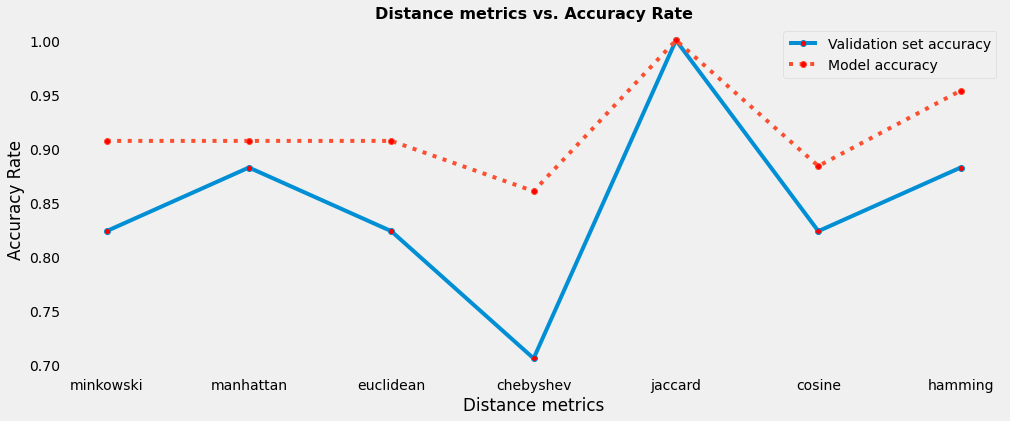

In [29]:
w_accuracy1=[]
met= ['minkowski','manhattan','euclidean','chebyshev','jaccard','cosine','hamming']
for i in met:
    knn= KNeighborsClassifier(n_neighbors=5,weights='distance',metric=i)
    knn.fit(x_train_new,y_train_new)
    w_accuracy1.append(metrics.accuracy_score(y_val,knn.predict(x_val)))
w_accuracy2=[]
for j in met:
    knn= KNeighborsClassifier(n_neighbors=5,weights='distance',metric=j)
    knn.fit(x_train,y_train)
    w_accuracy2.append(metrics.accuracy_score(y_test,knn.predict(x_test)))

plt.figure(figsize=(15,6))
plt.plot(met,w_accuracy1,marker='o',markerfacecolor='r')
plt.plot(met,w_accuracy2,marker='o',markerfacecolor='r',linestyle='dotted')
plt.xlabel("Distance metrics")
plt.ylabel("Accuracy Rate")
plt.title("Distance metrics vs. Accuracy Rate", fontsize=16, fontweight='bold')
plt.legend(['Validation set accuracy','Model accuracy'])
plt.grid()
w_accurate_val=pd.DataFrame(w_accuracy1,index=['minkowski','manhattan','euclidean','chebyshev','jaccard','cosine','hamming'],columns=["accuracy rate"])
w_accurate_test=pd.DataFrame(w_accuracy2,index=['minkowski','manhattan','euclidean','chebyshev','jaccard','cosine','hamming'],columns=["accuracy rate"])

In [30]:
w_accurate=pd.concat([w_accurate_test,w_accurate_val],axis=1,keys=['Model(Weighted)','Validation set(weighted)'])
w_accurate

,Model(Weighted),Validation set(weighted)
,accuracy rate,accuracy rate
minkowski,0.906977,0.823529
manhattan,0.906977,0.882353
euclidean,0.906977,0.823529
chebyshev,0.860465,0.705882
jaccard,1.000000,1.000000
cosine,0.883721,0.823529
hamming,0.953488,0.882353


In [31]:
final_knn= KNeighborsClassifier(n_neighbors=5,weights='distance',metric='jaccard')
final_knn.fit(x_train,y_train)
final_predictions=final_knn.predict(x_test)
final_accuracy=metrics.accuracy_score(y_test,final_predictions)
print(f'Final accuracy is {final_accuracy} after using the jaccard metric.')

Final accuracy is 1.0 after using the jaccard metric.


#### 2.6 Different KNN Algorithms

,Model(algorithms),Validation set(algorithms)
,accuracy rate,accuracy rate
auto,0.906977,0.823529
ball_tree,0.906977,0.823529
kd_tree,0.906977,0.823529
brute,0.906977,0.823529


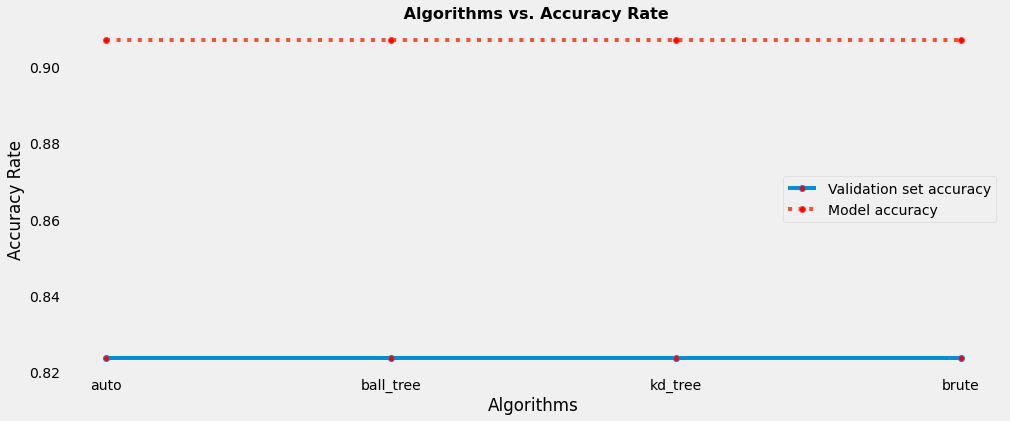

In [32]:
alg_accuracy1=[]
alg= ['auto','ball_tree','kd_tree','brute']
for i in alg:
    knn= KNeighborsClassifier(n_neighbors=5,weights='distance',algorithm=i)
    knn.fit(x_train_new,y_train_new)
    alg_accuracy1.append(metrics.accuracy_score(y_val,knn.predict(x_val)))
alg_accuracy2=[]
for j in alg:
    knn= KNeighborsClassifier(n_neighbors=5,weights='distance',algorithm=j)
    knn.fit(x_train,y_train)
    alg_accuracy2.append(metrics.accuracy_score(y_test,knn.predict(x_test)))

plt.figure(figsize=(15,6))
plt.plot(alg,alg_accuracy1,marker='o',markerfacecolor='r')
plt.plot(alg,alg_accuracy2,marker='o',markerfacecolor='r',linestyle='dotted')
plt.xlabel("Algorithms")
plt.ylabel("Accuracy Rate")
plt.title(" Algorithms vs. Accuracy Rate", fontsize=16, fontweight='bold')
plt.legend(['Validation set accuracy','Model accuracy'])
plt.grid()

alg_accurate_val=pd.DataFrame(alg_accuracy1,index=['auto','ball_tree','kd_tree','brute'],columns=["accuracy rate"])
alg_accurate_test=pd.DataFrame(alg_accuracy2,index=['auto','ball_tree','kd_tree','brute'],columns=["accuracy rate"])
alg_accurate=pd.concat([alg_accurate_test,alg_accurate_val],axis=1,keys=[' Model(algorithms)','Validation set(algorithms)'])
alg_accurate

Changing algorithms doesn't effect the accuracy at all, whereas, changing weights and distance metrics did effect the accuracy, and provided the best result.

Like shown above, with __k = 5__ and __distance metric = 'jaccard'__, achieved 100% accuracy.

#### 2.7 [CM7] Report on accuracy, AUC and f-score

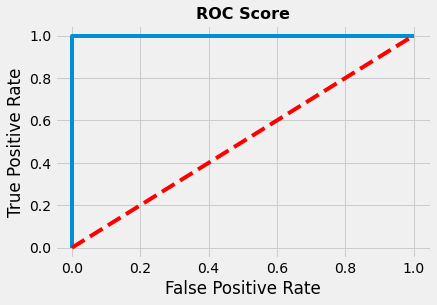


With updated k and distance metrics, the final accuracy is 1.0. ROC score is 1.0. AUC is 1.0, and f-score is 1.0.



,0,1,accuracy,macro avg,weighted avg
precision,1.0,1.0,1.0,1.0,1.0
recall,1.0,1.0,1.0,1.0,1.0
f1-score,1.0,1.0,1.0,1.0,1.0
support,17.0,26.0,1.0,43.0,43.0


In [33]:
# Final Accuracy
final_accuracy=metrics.accuracy_score(y_test,final_predictions)
# ROC Plot
ra_score2=roc_auc_score(y_test,final_predictions)
fpr2, tpr2, thresholds2= roc_curve(y_test,final_knn.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr2, tpr2, label=" AUC : %0.2f"% ra_score2)
plt.plot((0,1),'r--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title('ROC Score',fontweight='bold',fontsize=16)
plt.show()
# Final AUC
final_auc= metrics.auc(fpr2,tpr2)
# Final f-score and Accuracy
final_f1score= metrics.f1_score(y_test,final_predictions,average='macro')
# Output
print(f'\nWith updated k and distance metrics, the final accuracy is {final_accuracy}. ROC score is {ra_score2}. AUC is {final_auc}, and f-score is {final_f1score}.\n')

final_cr=classification_report(y_test,final_predictions,output_dict=True)
final_cr= pd.DataFrame(final_cr)
final_cr

#####  Final Model Evaluation Report:

In [34]:
final_eval=pd.DataFrame({'Evaluation Report':['F1 Score','AUC','Accuracy'], 'Value':[final_f1score,final_auc,final_accuracy]})
final_eval

,Evaluation Report,Value
0,F1 Score,1.0
1,AUC,1.0
2,Accuracy,1.0


The weighted parameter tuning helps in achieving the 100% of accuracy with distance metric 'jaccard', with both validation and test set has shown maximum accuracy. However, algorithm change shows no impact on accuracy, both in validation and test set.

In conslusion (shown in the table above), the improved f1score, auc and accuracy is 1.